Virtual Environments = Data 205 capstone

In [ ]:
'''
WEBSCRAPING TO GET DATASETS

Search Criteria Use on PubMed: 
1-"Hemolysis"[tiab] or "blood damage"[tiab],
2- ("Hemolysis"[tiab] or "blood damage"[tiab]) AND "Medical Devices"[tiab],
3- ("Hemolysis"[tiab] or "blood damage"[tiab]) AND "Heart Valves"[tiab],
4- ("Hemolysis"[tiab] or "blood damage"[tiab]) AND "Medical Devices" [tiab] OR "hemodialyzers"[tiab],
5- ("Hemolysis"[tiab] or "blood damage"[tiab]) AND "ventricular assist devices (VADs)"[tiab],
6- ("Hemolysis"[tiab] or "blood damage"[tiab]) AND "Medical Devices" [tiab] OR "endovascular grafts"[tiab], 
7- ("Hemolysis"[tiab] or "blood damage"[tiab]) AND "Medical Devices" [tiab] OR "inferior vena cava (IVC) filters"[tiab],
8- ("Hemolysis"[tiab] or "blood damage"[tiab]) AND ("Medical Devices"[tiab] OR "heart valves"[tiab] OR "hemodialyzers"[tiab] OR "ventricular assist devices (VADs)"[tiab] OR "endovascular grafts"[tiab] OR "inferior vena cava (IVC) filters"[tiab]),

Extract Data: Titles, Authors, Journal, PMID, Affiliations, Cited_by,
- Using URL links 
- PubMed website
- Make a list of PMIDS
- Use a for loop to get a list of PMIDS, using the list of PMIDs
- Create coded to collect Titles, Authors, Journal, PMID, Affiliations, Cited_by,
-Join all the dataset related to each search criteria,
- Save the data in .csv file
'''

#### Dataset Information:
 The The dataset under analysis comprises bibliographic details of scientific publications within the field of biomedicine. 
 
##### Variables: Titles: Represents the titles of the scientific publications.

Authors: Indicates the contributing authors associated with each publication.
Journal: Denotes the specific journals where the publications were published.
PMID: Serves as the unique identifier for each publication.
Affiliations: Provides information about the affiliations of the authors.
Cited_by: Lists the articles that have cited each respective publication.

##### Data Sizes:  "Hemolysis" Or "blood damage"
Number of Publications: 10360
Number of Variables: 7

##### Data Structure:

The dataset is formatted as a structured CSV file, with each row corresponding to a particular publication, and each column representing a distinct variable.

##### Data Cleaning:

To ensure data integrity, missing values were handled through imputation methods, while duplicates were removed based on the PMID identifier.

##### Data Quality:

A comprehensive data quality check was conducted, addressing potential data entry errors and outliers that were appropriately managed during the preprocessing stage.

##### Data Types: 

Titles: String
Authors: List of Strings
Journal: String
PMID: String
Affiliations: List of Strings
Cited_by: List of Strings

##### Data Distribution:

The dataset demonstrates a balanced distribution across various publication years and journals.

##### Potential Challenges:

Some publications may contain missing or incomplete data for specific variables.
Variations in the formatting of author names and affiliations could present challenges during analysis.

##### research_questions

What are the most common words in the titles of the publications?
Who are the most prolific authors in the dataset?
What are the top journals in terms of the number of publications?
How has the number of publications evolved over the years?
Is there a correlation between the publication year and the number of citations?
Are there any trends in the topics of publications over time?
Which authors have collaborated the most?
Are there any patterns in co-authorships within the dataset?
What are the top keywords associated with the most prolific authors' publications?
What is the distribution of the number of citations for the publications?
Are there any outliers in terms of highly cited publications?
Is there a correlation between the journal's impact factor and the number of citations?
Which journals have published the most articles?
Are there any specific topics that certain journals tend to focus on?
What is the distribution of publications across different journals?
What are the most common topics or themes based on the words used in the titles?
Are there any emerging research areas based on the analysis of the titles?
Is there any overlap in the topics covered by different authors or journals?
Are there any patterns in terms of authors collaborating across different journals?
How does the collaboration network of authors look within the dataset?
Are there any prolific author pairs or groups that frequently collaborate?

### Hemolysis and Heart Valve

In [32]:
## Import libraries
import csv
import re
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import requests

In [33]:
# PubMed Website URL
baseURL = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Heart+Valve%22%5Btiab%5D&filter=years.2015-2023'
print(baseURL)
response = requests.get(baseURL)
print(response)

https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Heart+Valve%22%5Btiab%5D&filter=years.2015-2023
<Response [200]>


In [34]:
# Interpret response.content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser') #lxml = library to parse HTML and other languages
print(soup)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.55dd827ca

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base_url
base_url = "https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Heart+Valve%22%5Btiab%5D&filter=years.2015-2023"

#Create a list 
all_data = []

# Multiple pages to extract data from all of them
for page_num in range(1,6):  # Adjust the range according to the number of pages to scrape
    url = base_url + str(page_num)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        journal = article.find('span', class_='docsum-journal-citation full-journal-citation').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()
        #publication_year = article.find('span', class_='docsum-journal-citation full-journal-citation').text.strip()
        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
        })

# Print or further process the extracted data as needed
for data in all_data:
    print(data)
    
    # Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)

{'Title': 'Simulation of Mechanical Heart Valve Dysfunction and the Non-Newtonian Blood Model Approach.', 'Authors': 'Chen A, Basri AAB, Ismail NB, Tamagawa M, Zhu D, Ahmad KA.', 'Journal': 'Appl Bionics Biomech. 2022 Apr 19;2022:9612296. doi: 10.1155/2022/9612296. eCollection 2022.', 'PMID': 'PMID: 35498142', 'Publication_year': '2022', 'Affiliations': ''}
{'Title': 'Past and future of blood damage modelling in a view of translational research.', 'Authors': 'Goubergrits L, Kertzscher U, Lommel M.', 'Journal': 'Int J Artif Organs. 2019 Mar;42(3):125-132. doi: 10.1177/0391398818790343. Epub 2018 Aug 3.', 'PMID': 'PMID: 30073891', 'Publication_year': '2019', 'Affiliations': ''}
{'Title': 'Mechanical Hemolysis Complicating Transcatheter Interventions for Valvular Heart Disease: JACC State-of-the-Art Review.', 'Authors': 'Cannata A, Cantoni S, Sciortino A, Bruschi G, Russo CF.', 'Journal': 'J Am Coll Cardiol. 2021 May 11;77(18):2323-2334. doi: 10.1016/j.jacc.2021.03.295.', 'PMID': 'PMID: 3

In [36]:
num_articles = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles}")

The number of articles in the DataFrame is: 50


In [37]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Simulation of Mechanical Heart Valve Dysfuncti...,"Chen A, Basri AAB, Ismail NB, Tamagawa M, Zhu ...",Appl Bionics Biomech. 2022 Apr 19;2022:9612296...,PMID: 35498142,2022,
1,Past and future of blood damage modelling in a...,"Goubergrits L, Kertzscher U, Lommel M.",Int J Artif Organs. 2019 Mar;42(3):125-132. do...,PMID: 30073891,2019,
2,Mechanical Hemolysis Complicating Transcathete...,"Cannata A, Cantoni S, Sciortino A, Bruschi G, ...",J Am Coll Cardiol. 2021 May 11;77(18):2323-233...,PMID: 33958130,2021,
3,Fetal Transcatheter Trileaflet Heart Valve Hem...,"Hatoum H, Gooden S, Heitkemper M, Blum KM, Zak...",Ann Biomed Eng. 2020 Jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,
4,Heart valve inspired and multi-stream aortic c...,"Rasooli R, Pekkan K.",Artif Organs. 2019 Oct;43(10):E233-E248. doi: ...,PMID: 30916790,2019,
5,Decreased Hemolysis and Improved Hemodynamic P...,"Chou CC, Wu TC, Liang HY, Chow YC, Yeh CH, Che...",Ann Thorac Surg. 2016 Mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,
6,Transcatheter valvular therapies in patients w...,"Dagher O, Santaló-Corcoy M, Perrin N, Dorval J...",Front Cardiovasc Med. 2023 Mar 13;10:1071805. ...,PMID: 36993995,2023,
7,Hematologic Effects of Heart Valve Prostheses ...,"Monsefi N, Zierer A, Beiras-Fernandez A, Werne...",Thorac Cardiovasc Surg. 2015 Sep;63(6):452-8. ...,PMID: 25703635,2015,
8,Development of Antithrombogenic ECM-Based Nano...,"Seyrek A, Günal G, Aydin HM.",ACS Appl Bio Mater. 2022 Aug 15;5(8):3883-3895...,PMID: 35839464,2022,
9,Turbulence in blood damage modeling.,"Goubergrits L, Osman J, Mevert R, Kertzscher U...",Int J Artif Organs. 2016 Jun 15;39(4):160-5. d...,PMID: 27034315,2016,


In [38]:
## Create the URL

baseurl1 = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl1} + df.iloc[0:3]')
affiliations

<Response [404]>

In [39]:
## Create a list to get the affiliations_url
affiliations_url = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl1}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url.append(search_url)
affiliations_url

https://pubmed.ncbi.nlm.nih.gov/35498142
https://pubmed.ncbi.nlm.nih.gov/30073891
https://pubmed.ncbi.nlm.nih.gov/33958130
https://pubmed.ncbi.nlm.nih.gov/32052320
https://pubmed.ncbi.nlm.nih.gov/30916790
https://pubmed.ncbi.nlm.nih.gov/26897194
https://pubmed.ncbi.nlm.nih.gov/36993995
https://pubmed.ncbi.nlm.nih.gov/25703635
https://pubmed.ncbi.nlm.nih.gov/35839464
https://pubmed.ncbi.nlm.nih.gov/27034315
https://pubmed.ncbi.nlm.nih.gov/35498142
https://pubmed.ncbi.nlm.nih.gov/30073891
https://pubmed.ncbi.nlm.nih.gov/33958130
https://pubmed.ncbi.nlm.nih.gov/32052320
https://pubmed.ncbi.nlm.nih.gov/30916790
https://pubmed.ncbi.nlm.nih.gov/26897194
https://pubmed.ncbi.nlm.nih.gov/36993995
https://pubmed.ncbi.nlm.nih.gov/25703635
https://pubmed.ncbi.nlm.nih.gov/35839464
https://pubmed.ncbi.nlm.nih.gov/27034315
https://pubmed.ncbi.nlm.nih.gov/35498142
https://pubmed.ncbi.nlm.nih.gov/30073891
https://pubmed.ncbi.nlm.nih.gov/33958130
https://pubmed.ncbi.nlm.nih.gov/32052320
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/35498142',
 'https://pubmed.ncbi.nlm.nih.gov/30073891',
 'https://pubmed.ncbi.nlm.nih.gov/33958130',
 'https://pubmed.ncbi.nlm.nih.gov/32052320',
 'https://pubmed.ncbi.nlm.nih.gov/30916790',
 'https://pubmed.ncbi.nlm.nih.gov/26897194',
 'https://pubmed.ncbi.nlm.nih.gov/36993995',
 'https://pubmed.ncbi.nlm.nih.gov/25703635',
 'https://pubmed.ncbi.nlm.nih.gov/35839464',
 'https://pubmed.ncbi.nlm.nih.gov/27034315',
 'https://pubmed.ncbi.nlm.nih.gov/35498142',
 'https://pubmed.ncbi.nlm.nih.gov/30073891',
 'https://pubmed.ncbi.nlm.nih.gov/33958130',
 'https://pubmed.ncbi.nlm.nih.gov/32052320',
 'https://pubmed.ncbi.nlm.nih.gov/30916790',
 'https://pubmed.ncbi.nlm.nih.gov/26897194',
 'https://pubmed.ncbi.nlm.nih.gov/36993995',
 'https://pubmed.ncbi.nlm.nih.gov/25703635',
 'https://pubmed.ncbi.nlm.nih.gov/35839464',
 'https://pubmed.ncbi.nlm.nih.gov/27034315',
 'https://pubmed.ncbi.nlm.nih.gov/35498142',
 'https://pubmed.ncbi.nlm.nih.gov/30073891',
 'https://

In [40]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Print the list of PMIDs
print(pmids_list)

['PMID: 35498142', 'PMID: 30073891', 'PMID: 33958130', 'PMID: 32052320', 'PMID: 30916790', 'PMID: 26897194', 'PMID: 36993995', 'PMID: 25703635', 'PMID: 35839464', 'PMID: 27034315', 'PMID: 35498142', 'PMID: 30073891', 'PMID: 33958130', 'PMID: 32052320', 'PMID: 30916790', 'PMID: 26897194', 'PMID: 36993995', 'PMID: 25703635', 'PMID: 35839464', 'PMID: 27034315', 'PMID: 35498142', 'PMID: 30073891', 'PMID: 33958130', 'PMID: 32052320', 'PMID: 30916790', 'PMID: 26897194', 'PMID: 36993995', 'PMID: 25703635', 'PMID: 35839464', 'PMID: 27034315', 'PMID: 35498142', 'PMID: 30073891', 'PMID: 33958130', 'PMID: 32052320', 'PMID: 30916790', 'PMID: 26897194', 'PMID: 36993995', 'PMID: 25703635', 'PMID: 35839464', 'PMID: 27034315', 'PMID: 35498142', 'PMID: 30073891', 'PMID: 33958130', 'PMID: 32052320', 'PMID: 30916790', 'PMID: 26897194', 'PMID: 36993995', 'PMID: 25703635', 'PMID: 35839464', 'PMID: 27034315']


In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL for PubMed
baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'

# get list of PMIDs from hemolysis.csv
pmids_list = df['PMID'].tolist()

# Initialize an empty list to store all affiliations
affiliations_list = []

# Loop through each pmid in the pmid_list
for pmid in pmids_list:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'
    
    # Send a GET request to the URL
    response = requests.get(url)
    
    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the ul element with class "item-list"
        ul_element = soup.find('ul', class_='item-list')
        
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')
            
            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list.append(affiliations)
            
            for li in li_elements:
                # Scrape and print the text content of each li element
                print(li.text)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list.append(affiliation_element.text.strip())
            else:
                affiliations_list.append("No affiliations found")
                print(f"No affiliations found on {url}")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Make sure the length of affiliations_list matches the length of df['PMID']
if len(affiliations_list) == len(df):
    # Add the affiliations_list to the DataFrame
    df['Affiliations'] = affiliations_list
else:
    print("Length of the affiliations list does not match the length of the DataFrame.")

# Display the updated DataFrame
print(df)

1 Faculty of Engineering, Universiti Putra Malaysia, Serdang, Selangor 43400, Malaysia.
2 Faculty of Medicine and Health Sciences, Universiti Putra Malaysia, Serdang, Selangor 43400, Malaysia.
3 Graduate School of Life Science and Systems Engineering, Kyushu Institute of Technology, Kitakyushu, Fukuoka 804-8550, Japan.
1 Institute for Computational and Imaging Science in Cardiovascular Medicine, Charité - Universitätsmedizin Berlin, Berlin, Germany.
1 Department of Cardiac Surgery, Niguarda Hospital, Milan, Italy. Electronic address: aldo.cannata@ospedaleniguarda.it.
2 Department of Hematology, Niguarda Hospital, Milan, Italy.
3 Department of Cardiac Surgery, Niguarda Hospital, Milan, Italy.
1 The Wallace H. Coulter Department of Biomedical Engineering, Georgia Institute of Technology, 387 Technology Circle NW, Atlanta, GA, 30313, USA.
2 Center for Regenerative Medicine, Tissue Engineering Program, The Research Institute at Nationwide Children's Hospital, Columbus, OH, USA.
3 Case West

In [42]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Simulation of Mechanical Heart Valve Dysfuncti...,"Chen A, Basri AAB, Ismail NB, Tamagawa M, Zhu ...",Appl Bionics Biomech. 2022 Apr 19;2022:9612296...,PMID: 35498142,2022,"1 Faculty of Engineering, Universiti Putra Mal..."
1,Past and future of blood damage modelling in a...,"Goubergrits L, Kertzscher U, Lommel M.",Int J Artif Organs. 2019 Mar;42(3):125-132. do...,PMID: 30073891,2019,1 Institute for Computational and Imaging Scie...
2,Mechanical Hemolysis Complicating Transcathete...,"Cannata A, Cantoni S, Sciortino A, Bruschi G, ...",J Am Coll Cardiol. 2021 May 11;77(18):2323-233...,PMID: 33958130,2021,"1 Department of Cardiac Surgery, Niguarda Hosp..."
3,Fetal Transcatheter Trileaflet Heart Valve Hem...,"Hatoum H, Gooden S, Heitkemper M, Blum KM, Zak...",Ann Biomed Eng. 2020 Jun;48(6):1683-1693. doi:...,PMID: 32052320,2020,1 The Wallace H. Coulter Department of Biomedi...
4,Heart valve inspired and multi-stream aortic c...,"Rasooli R, Pekkan K.",Artif Organs. 2019 Oct;43(10):E233-E248. doi: ...,PMID: 30916790,2019,"1 Department of Mechanical Engineering, Koç Un..."
5,Decreased Hemolysis and Improved Hemodynamic P...,"Chou CC, Wu TC, Liang HY, Chow YC, Yeh CH, Che...",Ann Thorac Surg. 2016 Mar;101(3):1153-8. doi: ...,PMID: 26897194,2016,1 Department of Mechanical & Mechatronic Engin...
6,Transcatheter valvular therapies in patients w...,"Dagher O, Santaló-Corcoy M, Perrin N, Dorval J...",Front Cardiovasc Med. 2023 Mar 13;10:1071805. ...,PMID: 36993995,2023,"1 Department of Surgery, Montreal Heart Instit..."
7,Hematologic Effects of Heart Valve Prostheses ...,"Monsefi N, Zierer A, Beiras-Fernandez A, Werne...",Thorac Cardiovasc Surg. 2015 Sep;63(6):452-8. ...,PMID: 25703635,2015,"1 Department of Thoracic, and Cardiovascular S..."
8,Development of Antithrombogenic ECM-Based Nano...,"Seyrek A, Günal G, Aydin HM.",ACS Appl Bio Mater. 2022 Aug 15;5(8):3883-3895...,PMID: 35839464,2022,"1 Nanotechnology and Nanomedicine Division, In..."
9,Turbulence in blood damage modeling.,"Goubergrits L, Osman J, Mevert R, Kertzscher U...",Int J Artif Organs. 2016 Jun 15;39(4):160-5. d...,PMID: 27034315,2016,"1 Biofluid Mechanics Laboratory, Charité Medic..."


In [43]:
# Save the modified DataFrame to a CSV file
df.to_csv('Hemolysis_Heart_Valve_data.csv', index=False)

### Hemolysis and Hemodialyzer

In [49]:
# PubMed Website URL
baseURL1 = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Hemodialyzer%22%5Btiab%5D&filter=years.2015-2023'
print(baseURL1)
response = requests.get(baseURL1)
print(response)

https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Hemodialyzer%22%5Btiab%5D&filter=years.2015-2023
<Response [200]>


In [46]:
# Interpret response.content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser') #lxml = library to parse HTML and other languages
print(soup)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.55dd827ca

In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL for the PubMed search
base_url = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Hemodialyzer%22%5Btiab%5D&filter=years.2015-2023&page='

# Create a list to store all data
all_data = []

# Specify the number of pages to scrape
num_pages = 1  # Adjust as needed

for page_num in range(1, num_pages + 1):
    # Construct the URL for each page
    url = base_url + str(page_num)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()
        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
        })

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)


                                               Title  \
0  Trilayer Interlinked Graphene Oxide Membrane f...   
1  Improved hemodialysis with hemocompatible poly...   

                                             Authors  \
0  Rode RP, Chung HH, Miller HN, Gaborski TR, Mog...   
1   Verma SK, Modi A, Singh AK, Teotia R, Bellare J.   

                                             Journal            PMID  \
0  Adv Mater Interfaces. 2021 Feb 5;8(3):2001985....  PMID: 33598379   
1  J Biomed Mater Res B Appl Biomater. 2018 Apr;1...  PMID: 28636168   

  Publication_year Affiliations  
0             2021               
1             2018               


In [53]:
num_articles1 = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles1}")

The number of articles in the DataFrame is: 2


In [55]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Trilayer Interlinked Graphene Oxide Membrane f...,"Rode RP, Chung HH, Miller HN, Gaborski TR, Mog...",Adv Mater Interfaces. 2021 Feb 5;8(3):2001985....,PMID: 33598379,2021,
1,Improved hemodialysis with hemocompatible poly...,"Verma SK, Modi A, Singh AK, Teotia R, Bellare J.",J Biomed Mater Res B Appl Biomater. 2018 Apr;1...,PMID: 28636168,2018,


In [59]:
## Create the URL

baseurl1 = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl1} + df.iloc[0:3]')
affiliations

<Response [404]>

In [61]:
## Create a list to get the affiliations_url
affiliations_url1 = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl1}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url1.append(search_url)
affiliations_url1

https://pubmed.ncbi.nlm.nih.gov/33598379
https://pubmed.ncbi.nlm.nih.gov/28636168


['https://pubmed.ncbi.nlm.nih.gov/33598379',
 'https://pubmed.ncbi.nlm.nih.gov/28636168']

In [62]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list1 = df['PMID'].tolist()

# Print the list of PMIDs
print(pmids_list1)

['PMID: 33598379', 'PMID: 28636168']


In [63]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL for PubMed
baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'

# get list of PMIDs from hemolysis.csv
pmids_list1 = df['PMID'].tolist()

# Initialize an empty list to store all affiliations
affiliations_list1 = []

# Loop through each pmid in the pmid_list
for pmid in pmids_list1:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'
    
    # Send a GET request to the URL
    response = requests.get(url)
    
    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the ul element with class "item-list"
        ul_element = soup.find('ul', class_='item-list')
        
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')
            
            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list1.append(affiliations)
            
            for li in li_elements:
                # Scrape and print the text content of each li element
                print(li.text)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list1.append(affiliation_element.text.strip())
            else:
                affiliations_list1.append("No affiliations found")
                print(f"No affiliations found on {url}")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Make sure the length of affiliations_list matches the length of df['PMID']
if len(affiliations_list) == len(df):
    # Add the affiliations_list to the DataFrame
    df['Affiliations'] = affiliations_list1
else:
    print("Length of the affiliations list does not match the length of the DataFrame.")

# Display the updated DataFrame
print(df)

1 Department of Mechanical Engineering, University of Florida, Gainesville, FL 32611, USA.
2 Biomedical Engineering Department, Rochester Institute of Technology, Rochester, NY 14623, USA.
1 Department of Chemical Engineering, Indian Institute of Technology Bombay, Mumbai, 400076, India.
2 Centre for Research in Nanotechnology and Science, Indian Institute of Technology Bombay, Mumbai, 400076, India.
3 Department of Biosciences and Bioengineering, Indian Institute of Technology Bombay, Mumbai, 400076, India.
4 Wadhwani Research Center for Bioengineering, Indian Institute of Technology Bombay, Mumbai, 400076, India.
Length of the affiliations list does not match the length of the DataFrame.
                                               Title  \
0  Trilayer Interlinked Graphene Oxide Membrane f...   
1  Improved hemodialysis with hemocompatible poly...   

                                             Authors  \
0  Rode RP, Chung HH, Miller HN, Gaborski TR, Mog...   
1   Verma SK, Modi A

In [67]:
# Add the affiliations_list to the DataFrame
df['Affiliations'] = affiliations_list1

In [68]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Trilayer Interlinked Graphene Oxide Membrane f...,"Rode RP, Chung HH, Miller HN, Gaborski TR, Mog...",Adv Mater Interfaces. 2021 Feb 5;8(3):2001985....,PMID: 33598379,2021,"1 Department of Mechanical Engineering, Univer..."
1,Improved hemodialysis with hemocompatible poly...,"Verma SK, Modi A, Singh AK, Teotia R, Bellare J.",J Biomed Mater Res B Appl Biomater. 2018 Apr;1...,PMID: 28636168,2018,"1 Department of Chemical Engineering, Indian I..."


In [69]:
# Save the modified DataFrame to a CSV file
df.to_csv('Hemolysis_Hemodialyzer_data.csv', index=False)

### Hemolysis and Ventricular Assist Device

In [70]:
# PubMed Website URL
baseURL2 = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%28%22Ventricular+Assist+Device%22%5Btiab%5D+OR+%22VAD%22%5Btiab%5D%29&filter=years.2015-2023'
print(baseURL2)
response = requests.get(baseURL2)
print(response)

https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%28%22Ventricular+Assist+Device%22%5Btiab%5D+OR+%22VAD%22%5Btiab%5D%29&filter=years.2015-2023
<Response [200]>


In [71]:
# Interpret response.content with BeautifulSoup
soup1 = BeautifulSoup(response.text, 'html.parser') #lxml = library to parse HTML and other languages
print(soup1)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.55dd827ca

In [73]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL for the PubMed search
baseURL2 = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%28%22Ventricular+Assist+Device%22%5Btiab%5D+OR+%22VAD%22%5Btiab%5D%29&filter=years.2015-2023'

# Create a list to store all data
all_data = []

# Specify the number of pages to scrape
num_pages = 23  # Adjust as needed

for page_num in range(1, num_pages + 1):
    # Construct the URL for each page
    url = baseURL2 + str(page_num)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()
        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
        })

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)


                                                 Title  \
0    Mechanical Left Ventricular Unloading in Patie...   
1    Blood damage in Left Ventricular Assist Device...   
2    Clinical implications of LDH isoenzymes in hem...   
3    Left Ventricular Unloading During Extracorpore...   
4    Microaxial Left Ventricular Assist Device in C...   
..                                                 ...   
225       Cardiac prostheses-related hemolytic anemia.   
226  Continuous and Pulsatile Pediatric Ventricular...   
227  Bleeding and thrombosis associated with ventri...   
228  Comprehensive review of hemolysis in ventricul...   
229   Antithrombotic Strategies and Device Thrombosis.   

                                               Authors  \
0    Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...   
1    Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...   
2    Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...   
3    Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...   
4    Tan SR, 

In [74]:
num_articles2 = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles2}")

The number of articles in the DataFrame is: 230


In [75]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Mechanical Left Ventricular Unloading in Patie...,"Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...",J Am Coll Cardiol. 2022 Apr 5;79(13):1239-1250...,PMID: 35361346,2022,
1,Blood damage in Left Ventricular Assist Device...,"Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...",Int J Artif Organs. 2019 Mar;42(3):113-124. do...,PMID: 30354870,2019,
2,Clinical implications of LDH isoenzymes in hem...,"Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...",Artif Organs. 2020 Mar;44(3):231-238. doi: 10....,PMID: 31494952,2020,
3,Left Ventricular Unloading During Extracorpore...,"Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...",J Am Coll Cardiol. 2019 Feb 19;73(6):654-662. ...,PMID: 30765031,2019,
4,Microaxial Left Ventricular Assist Device in C...,"Tan SR, Low CJW, Ng WL, Ling RR, Tan CS, Lim S...",Life (Basel). 2022 Oct 18;12(10):1629. doi: 10...,PMID: 36295065,2022,
...,...,...,...,...,...,...
225,Cardiac prostheses-related hemolytic anemia.,"Alkhouli M, Farooq A, Go RS, Balla S, Berzingi C.",Clin Cardiol. 2019 Jul;42(7):692-700. doi: 10....,PMID: 31039274,2019,
226,Continuous and Pulsatile Pediatric Ventricular...,"Good BC, Deutsch S, Manning KB.",Cardiovasc Eng Technol. 2016 Mar;7(1):23-43. d...,PMID: 26643646,2016,
227,Bleeding and thrombosis associated with ventri...,"Shah P, Tantry US, Bliden KP, Gurbel PA.",J Heart Lung Transplant. 2017 Nov;36(11):1164-...,PMID: 28579115,2017,
228,Comprehensive review of hemolysis in ventricul...,"Papanastasiou CA, Kyriakoulis KG, Theochari CA...",World J Cardiol. 2020 Jul 26;12(7):334-341. do...,PMID: 32843935,2020,


In [76]:
## Create the URL

baseurl2 = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl2} + df.iloc[0:3]')
affiliations

<Response [404]>

In [77]:
## Create a list to get the affiliations_url
affiliations_url1 = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl2}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url1.append(search_url)
affiliations_url1

https://pubmed.ncbi.nlm.nih.gov/35361346
https://pubmed.ncbi.nlm.nih.gov/30354870
https://pubmed.ncbi.nlm.nih.gov/31494952
https://pubmed.ncbi.nlm.nih.gov/30765031
https://pubmed.ncbi.nlm.nih.gov/36295065
https://pubmed.ncbi.nlm.nih.gov/31039274
https://pubmed.ncbi.nlm.nih.gov/26643646
https://pubmed.ncbi.nlm.nih.gov/28579115
https://pubmed.ncbi.nlm.nih.gov/32843935
https://pubmed.ncbi.nlm.nih.gov/30297071
https://pubmed.ncbi.nlm.nih.gov/35361346
https://pubmed.ncbi.nlm.nih.gov/30354870
https://pubmed.ncbi.nlm.nih.gov/31494952
https://pubmed.ncbi.nlm.nih.gov/30765031
https://pubmed.ncbi.nlm.nih.gov/36295065
https://pubmed.ncbi.nlm.nih.gov/31039274
https://pubmed.ncbi.nlm.nih.gov/26643646
https://pubmed.ncbi.nlm.nih.gov/28579115
https://pubmed.ncbi.nlm.nih.gov/32843935
https://pubmed.ncbi.nlm.nih.gov/30297071
https://pubmed.ncbi.nlm.nih.gov/35361346
https://pubmed.ncbi.nlm.nih.gov/30354870
https://pubmed.ncbi.nlm.nih.gov/31494952
https://pubmed.ncbi.nlm.nih.gov/30765031
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/35361346',
 'https://pubmed.ncbi.nlm.nih.gov/30354870',
 'https://pubmed.ncbi.nlm.nih.gov/31494952',
 'https://pubmed.ncbi.nlm.nih.gov/30765031',
 'https://pubmed.ncbi.nlm.nih.gov/36295065',
 'https://pubmed.ncbi.nlm.nih.gov/31039274',
 'https://pubmed.ncbi.nlm.nih.gov/26643646',
 'https://pubmed.ncbi.nlm.nih.gov/28579115',
 'https://pubmed.ncbi.nlm.nih.gov/32843935',
 'https://pubmed.ncbi.nlm.nih.gov/30297071',
 'https://pubmed.ncbi.nlm.nih.gov/35361346',
 'https://pubmed.ncbi.nlm.nih.gov/30354870',
 'https://pubmed.ncbi.nlm.nih.gov/31494952',
 'https://pubmed.ncbi.nlm.nih.gov/30765031',
 'https://pubmed.ncbi.nlm.nih.gov/36295065',
 'https://pubmed.ncbi.nlm.nih.gov/31039274',
 'https://pubmed.ncbi.nlm.nih.gov/26643646',
 'https://pubmed.ncbi.nlm.nih.gov/28579115',
 'https://pubmed.ncbi.nlm.nih.gov/32843935',
 'https://pubmed.ncbi.nlm.nih.gov/30297071',
 'https://pubmed.ncbi.nlm.nih.gov/35361346',
 'https://pubmed.ncbi.nlm.nih.gov/30354870',
 'https://

In [ ]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list1 = df['PMID'].tolist()

# Print the list of PMIDs
print(pmids_list1)

In [78]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL for PubMed
baseurl2 = 'https://pubmed.ncbi.nlm.nih.gov/'

# get list of PMIDs from hemolysis.csv
pmids_list1 = df['PMID'].tolist()

# Initialize an empty list to store all affiliations
affiliations_list1 = []

# Loop through each pmid in the pmid_list
for pmid in pmids_list1:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'
    
    # Send a GET request to the URL
    response = requests.get(url)
    
    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the ul element with class "item-list"
        ul_element = soup.find('ul', class_='item-list')
        
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')
            
            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list1.append(affiliations)
            
            for li in li_elements:
                # Scrape and print the text content of each li element
                print(li.text)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list1.append(affiliation_element.text.strip())
            else:
                affiliations_list1.append("No affiliations found")
                print(f"No affiliations found on {url}")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Make sure the length of affiliations_list matches the length of df['PMID']
if len(affiliations_list) == len(df):
    # Add the affiliations_list to the DataFrame
    df['Affiliations'] = affiliations_list1
else:
    print("Length of the affiliations list does not match the length of the DataFrame.")

# Display the updated DataFrame
print(df)

1 Division of Cardiovascular Medicine, Beth Israel Deaconess Medical Center, Boston, Massachusetts, USA; Smith Center for Outcomes Research in Cardiology, Beth Israel Deaconess Medical Center, Boston, Massachusetts, USA. Electronic address: wgrandin@bidmc.harvard.edu.
2 Department of Medicine. Montefiore Medical Center, Bronx, New York, USA.
3 Division of Cardiovascular Medicine, UMass Memorial Medical Center, Worcester, Massachusetts, USA.
4 Smith Center for Outcomes Research in Cardiology, Beth Israel Deaconess Medical Center, Boston, Massachusetts, USA.
5 Extracorporeal Life Support Organization, Ann Arbor, Michigan, USA.
6 Extracorporeal Life Support Organization, Ann Arbor, Michigan, USA; Division of Cardiothoracic Surgery and Emergency Medicine, University of Utah, Salt Lake City, Utah, USA.
7 The Cardiovascular Center, Tufts Medical Center, Boston, Massachusetts, USA.
8 Division of Anesthesia and Critical Care, Beth Israel Deaconess Medical Center, Boston, Massachusetts, USA.
9 

In [79]:
# Add the affiliations_list to the DataFrame
df['Affiliations'] = affiliations_list1

In [80]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Mechanical Left Ventricular Unloading in Patie...,"Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...",J Am Coll Cardiol. 2022 Apr 5;79(13):1239-1250...,PMID: 35361346,2022,"1 Division of Cardiovascular Medicine, Beth Is..."
1,Blood damage in Left Ventricular Assist Device...,"Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...",Int J Artif Organs. 2019 Mar;42(3):113-124. do...,PMID: 30354870,2019,"1 1 Department of Electronics, Information and..."
2,Clinical implications of LDH isoenzymes in hem...,"Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...",Artif Organs. 2020 Mar;44(3):231-238. doi: 10....,PMID: 31494952,2020,"1 Division of Cardiac Surgery, Thomas Jefferso..."
3,Left Ventricular Unloading During Extracorpore...,"Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...",J Am Coll Cardiol. 2019 Feb 19;73(6):654-662. ...,PMID: 30765031,2019,"1 University of Ottawa Heart Institute, Ottawa..."
4,Microaxial Left Ventricular Assist Device in C...,"Tan SR, Low CJW, Ng WL, Ling RR, Tan CS, Lim S...",Life (Basel). 2022 Oct 18;12(10):1629. doi: 10...,PMID: 36295065,2022,"1 Yong Loo Lin School of Medicine, National Un..."
...,...,...,...,...,...,...
225,Cardiac prostheses-related hemolytic anemia.,"Alkhouli M, Farooq A, Go RS, Balla S, Berzingi C.",Clin Cardiol. 2019 Jul;42(7):692-700. doi: 10....,PMID: 31039274,2019,"1 Division of Cardiology, Department of Medici..."
226,Continuous and Pulsatile Pediatric Ventricular...,"Good BC, Deutsch S, Manning KB.",Cardiovasc Eng Technol. 2016 Mar;7(1):23-43. d...,PMID: 26643646,2016,"1 Department of Biomedical Engineering, The Pe..."
227,Bleeding and thrombosis associated with ventri...,"Shah P, Tantry US, Bliden KP, Gurbel PA.",J Heart Lung Transplant. 2017 Nov;36(11):1164-...,PMID: 28579115,2017,1 Inova Center for Thrombosis Research and Dru...
228,Comprehensive review of hemolysis in ventricul...,"Papanastasiou CA, Kyriakoulis KG, Theochari CA...",World J Cardiol. 2020 Jul 26;12(7):334-341. do...,PMID: 32843935,2020,"1 1 Department of Cardiology, AHEPA Hospital, ..."


In [81]:
# Save the modified DataFrame to a CSV file
df.to_csv('Hemolysis_Ventricular_Assist_Device.csv', index=False)

### Hemolysis and Medical Devices or Endovascular Grafts

In [82]:
# PubMed Website URL
baseURL3 = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22endovascular+grafts%22%5Btiab%5D&filter=years.2015-2023'
print(baseURL3)
response = requests.get(baseURL2)
print(response)

https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22endovascular+grafts%22%5Btiab%5D&filter=years.2015-2023
<Response [200]>


In [83]:
# Interpret response.content with BeautifulSoup
soup2 = BeautifulSoup(response.text, 'html.parser') #lxml = library to parse HTML and other languages
print(soup2)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.55dd827ca

In [86]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL for the PubMed search
baseURL3 = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22endovascular+grafts%22%5Btiab%5D&filter=years.2015-2023'

# Create a list to store all data
all_data = []

# Specify the number of pages to scrape
num_pages = 14  # Adjust as needed

for page_num in range(1, num_pages + 1):
    # Construct the URL for each page
    url = baseURL3 + str(page_num)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()
        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
        })

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)


                                                 Title  \
0    Branched and Fenestrated Aortic Endovascular G...   
1    Fenestrated Physician-Modified Endovascular Gr...   
2    Potential of Superhydrophobic Surface for Bloo...   
3    In vitro hemocompatibility testing of medical ...   
4    Hemolysis Testing In Vitro: A Review of Challe...   
..                                                 ...   
135  In Vitro models for thrombogenicity testing of...   
136  Physician-Modified Endovascular Grafts for Zon...   
137  Red Blood Cell Sublethal Damage: Hemocompatibi...   
138      Shear-Induced Hemolysis: Species Differences.   
139  Practical implications of the erroneous treatm...   

                                               Authors  \
0                                Atkins AD, Atkins MD.   
1    Bacri C, Chastant R, Chassin-Trubert L, Hirech...   
2                     Wu XH, Liew YK, Mai CW, Then YY.   
3                                       Nalezinková M.   
4           v

In [87]:
num_articles3 = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles3}")

The number of articles in the DataFrame is: 140


In [88]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Branched and Fenestrated Aortic Endovascular G...,"Atkins AD, Atkins MD.",Methodist Debakey Cardiovasc J. 2023 Mar 7;19(...,PMID: 36910555,2023,
1,Fenestrated Physician-Modified Endovascular Gr...,"Bacri C, Chastant R, Chassin-Trubert L, Hirech...",J Endovasc Ther. 2023 Sep 27:15266028231202234...,PMID: 37752861,2023,
2,Potential of Superhydrophobic Surface for Bloo...,"Wu XH, Liew YK, Mai CW, Then YY.",Int J Mol Sci. 2021 Mar 24;22(7):3341. doi: 10...,PMID: 33805207,2021,
3,In vitro hemocompatibility testing of medical ...,Nalezinková M.,Thromb Res. 2020 Nov;195:146-150. doi: 10.1016...,PMID: 32698094,2020,
4,Hemolysis Testing In Vitro: A Review of Challe...,"von Petersdorff-Campen K, Schmid Daners M.",ASAIO J. 2022 Jan 1;68(1):3-13. doi: 10.1097/M...,PMID: 33989208,2022,
...,...,...,...,...,...,...
135,In Vitro models for thrombogenicity testing of...,"Sarode DN, Roy S.",Expert Rev Med Devices. 2019 Jul;16(7):603-616...,PMID: 31154869,2019,
136,Physician-Modified Endovascular Grafts for Zon...,"Queiroz AB, Lopes JB, Santos VP, Cruz PBAF, Fi...",Aorta (Stamford). 2022 Feb;10(1):13-19. doi: 1...,PMID: 35640582,2022,
137,Red Blood Cell Sublethal Damage: Hemocompatibi...,"McNamee AP, Simmonds MJ.",Transfus Med Rev. 2023 Apr;37(2):150723. doi: ...,PMID: 37031086,2023,
138,Shear-Induced Hemolysis: Species Differences.,"Ding J, Niu S, Chen Z, Zhang T, Griffith BP, W...",Artif Organs. 2015 Sep;39(9):795-802. doi: 10....,PMID: 25899978,2015,


In [89]:
## Create the URL

baseurl3 = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl3} + df.iloc[0:3]')
affiliations

<Response [404]>

In [90]:
## Create a list to get the affiliations_url
affiliations_url2 = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl3}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url2.append(search_url)
affiliations_url2

https://pubmed.ncbi.nlm.nih.gov/36910555
https://pubmed.ncbi.nlm.nih.gov/37752861
https://pubmed.ncbi.nlm.nih.gov/33805207
https://pubmed.ncbi.nlm.nih.gov/32698094
https://pubmed.ncbi.nlm.nih.gov/33989208
https://pubmed.ncbi.nlm.nih.gov/31154869
https://pubmed.ncbi.nlm.nih.gov/35640582
https://pubmed.ncbi.nlm.nih.gov/37031086
https://pubmed.ncbi.nlm.nih.gov/25899978
https://pubmed.ncbi.nlm.nih.gov/37032625
https://pubmed.ncbi.nlm.nih.gov/36910555
https://pubmed.ncbi.nlm.nih.gov/37752861
https://pubmed.ncbi.nlm.nih.gov/33805207
https://pubmed.ncbi.nlm.nih.gov/32698094
https://pubmed.ncbi.nlm.nih.gov/33989208
https://pubmed.ncbi.nlm.nih.gov/31154869
https://pubmed.ncbi.nlm.nih.gov/35640582
https://pubmed.ncbi.nlm.nih.gov/37031086
https://pubmed.ncbi.nlm.nih.gov/25899978
https://pubmed.ncbi.nlm.nih.gov/37032625
https://pubmed.ncbi.nlm.nih.gov/36910555
https://pubmed.ncbi.nlm.nih.gov/37752861
https://pubmed.ncbi.nlm.nih.gov/33805207
https://pubmed.ncbi.nlm.nih.gov/32698094
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/36910555',
 'https://pubmed.ncbi.nlm.nih.gov/37752861',
 'https://pubmed.ncbi.nlm.nih.gov/33805207',
 'https://pubmed.ncbi.nlm.nih.gov/32698094',
 'https://pubmed.ncbi.nlm.nih.gov/33989208',
 'https://pubmed.ncbi.nlm.nih.gov/31154869',
 'https://pubmed.ncbi.nlm.nih.gov/35640582',
 'https://pubmed.ncbi.nlm.nih.gov/37031086',
 'https://pubmed.ncbi.nlm.nih.gov/25899978',
 'https://pubmed.ncbi.nlm.nih.gov/37032625',
 'https://pubmed.ncbi.nlm.nih.gov/36910555',
 'https://pubmed.ncbi.nlm.nih.gov/37752861',
 'https://pubmed.ncbi.nlm.nih.gov/33805207',
 'https://pubmed.ncbi.nlm.nih.gov/32698094',
 'https://pubmed.ncbi.nlm.nih.gov/33989208',
 'https://pubmed.ncbi.nlm.nih.gov/31154869',
 'https://pubmed.ncbi.nlm.nih.gov/35640582',
 'https://pubmed.ncbi.nlm.nih.gov/37031086',
 'https://pubmed.ncbi.nlm.nih.gov/25899978',
 'https://pubmed.ncbi.nlm.nih.gov/37032625',
 'https://pubmed.ncbi.nlm.nih.gov/36910555',
 'https://pubmed.ncbi.nlm.nih.gov/37752861',
 'https://

In [92]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list2 = df['PMID'].tolist()

# Print the list of PMIDs
#print(pmids_list2)

In [97]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL for PubMed
baseurl3 = 'https://pubmed.ncbi.nlm.nih.gov/'

# get list of PMIDs from hemolysis.csv
pmids_list2 = df['PMID'].tolist()

# Initialize an empty list to store all affiliations
affiliations_list2 = []

# Loop through each pmid in the pmid_list
for pmid in pmids_list2:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'
    
    # Send a GET request to the URL
    response = requests.get(url)
    
    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the ul element with class "item-list"
        ul_element = soup.find('ul', class_='item-list')
        
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')
            
            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list2.append(affiliations)
            
            for li in li_elements:
                # Scrape and print the text content of each li element
                print(li.text)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list2.append(affiliation_element.text.strip())
            else:
                affiliations_list2.append("No affiliations found")
                print(f"No affiliations found on {url}")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Make sure the length of affiliations_list matches the length of df['PMID']
if len(affiliations_list) == len(df):
    # Add the affiliations_list to the DataFrame
    df['Affiliations'] = affiliations_list2
else:
    print("Length of the affiliations list does not match the length of the DataFrame.")

# Display the updated DataFrame
print(df)

1 Texas A&M University Department of Biomedical Engineering, College Station, Texas, US.
2 Houston Methodist DeBakey Cardiovascular Surgery Associates, Houston, Texas, US.
1 Department of Thoracic and Vascular Surgery, Arnaud de Villeneuve Hospital, Montpellier, France.
2 Department of Vascular and Endovascular Surgery, University Hospital of the Andes, Las Condes, Chile.
3 Physiology and Experimental Medicine of the Heart and Muscles, University of Montpellier, CNRS, INSERM, CHU Montpellier, Montpellier, France.
1 School of Postgraduate Studies, International Medical University, Kuala Lumpur 57000, Malaysia.
2 Department of Life Sciences, School of Pharmacy, International Medical University, Kuala Lumpur 57000, Malaysia.
3 Department of Pharmaceutical Chemistry, School of Pharmacy, International Medical University, Kuala Lumpur 57000, Malaysia.
1 Department of Biology, University of Hradec Králové, Rokitanského 62, Hradec Králové 500 03, Czech Republic. Electronic address: martina.nal

In [99]:
# Add the affiliations_list to the DataFrame
df['Affiliations'] = affiliations_list2

In [100]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Branched and Fenestrated Aortic Endovascular G...,"Atkins AD, Atkins MD.",Methodist Debakey Cardiovasc J. 2023 Mar 7;19(...,PMID: 36910555,2023,1 Texas A&M University Department of Biomedica...
1,Fenestrated Physician-Modified Endovascular Gr...,"Bacri C, Chastant R, Chassin-Trubert L, Hirech...",J Endovasc Ther. 2023 Sep 27:15266028231202234...,PMID: 37752861,2023,"1 Department of Thoracic and Vascular Surgery,..."
2,Potential of Superhydrophobic Surface for Bloo...,"Wu XH, Liew YK, Mai CW, Then YY.",Int J Mol Sci. 2021 Mar 24;22(7):3341. doi: 10...,PMID: 33805207,2021,"1 School of Postgraduate Studies, Internationa..."
3,In vitro hemocompatibility testing of medical ...,Nalezinková M.,Thromb Res. 2020 Nov;195:146-150. doi: 10.1016...,PMID: 32698094,2020,"1 Department of Biology, University of Hradec ..."
4,Hemolysis Testing In Vitro: A Review of Challe...,"von Petersdorff-Campen K, Schmid Daners M.",ASAIO J. 2022 Jan 1;68(1):3-13. doi: 10.1097/M...,PMID: 33989208,2022,"1 From the Product Development Group Zurich, D..."
...,...,...,...,...,...,...
135,In Vitro models for thrombogenicity testing of...,"Sarode DN, Roy S.",Expert Rev Med Devices. 2019 Jul;16(7):603-616...,PMID: 31154869,2019,1 a Department of Bioengineering and Therapeut...
136,Physician-Modified Endovascular Grafts for Zon...,"Queiroz AB, Lopes JB, Santos VP, Cruz PBAF, Fi...",Aorta (Stamford). 2022 Feb;10(1):13-19. doi: 1...,PMID: 35640582,2022,"1 Centro de Doenças da Aorta - CDA, Division o..."
137,Red Blood Cell Sublethal Damage: Hemocompatibi...,"McNamee AP, Simmonds MJ.",Transfus Med Rev. 2023 Apr;37(2):150723. doi: ...,PMID: 37031086,2023,"1 Biorheology Research Laboratory, Menzies Hea..."
138,Shear-Induced Hemolysis: Species Differences.,"Ding J, Niu S, Chen Z, Zhang T, Griffith BP, W...",Artif Organs. 2015 Sep;39(9):795-802. doi: 10....,PMID: 25899978,2015,"1 Artificial Organs Laboratory, Department of ..."


In [101]:
# Save the modified DataFrame to a CSV file
df.to_csv('Hemolysis_Endovascular_Graft.csv', index=False)

### Hemolysis and Medical Devices or Inferior Vena Cava Filters

In [102]:
# PubMed Website URL
baseURL4 = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22inferior+vena+cava+%28IVC%29+filters%22%5Btiab%5D&filter=years.2015-2023'
print(baseURL4)
response = requests.get(baseURL4)
print(response)

https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22inferior+vena+cava+%28IVC%29+filters%22%5Btiab%5D&filter=years.2015-2023
<Response [200]>


In [103]:
# Interpret response.content with BeautifulSoup
soup3 = BeautifulSoup(response.text, 'html.parser') #lxml = library to parse HTML and other languages
print(soup3)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/1e50868b-da01-4bc0-8fb1-7d35b0eecbe6/CACHE/css/output.55dd827ca

In [119]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL for the PubMed search
baseURL4 = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%22Medical+Devices%22+%5Btiab%5D+OR+%22inferior+vena+cava+%28IVC%29+filters%22%5Btiab%5D&filter=years.2015-2023'
# Create a list to store all data
all_data = []

# Specify the number of pages to scrape
num_pages = 28  # Adjust as needed

# Count the number of unique PMIDs in the DataFrame
unique_pmids = df['PMID'].nunique()
print(f"Number of unique publications: {unique_pmids}")


for page_num in range(1, num_pages + 1):
    # Construct the URL for each page
    url = baseURL4 + str(page_num)
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()
        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
        })

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)


Number of unique publications: 10
                                                 Title  \
0                          Inferior vena cava filters.   
1    Inferior Vena Cava Filters to Prevent Pulmonar...   
2    Factors predicting failure of retrieval of inf...   
3    Effectiveness and Safety of Laser-Assisted Rem...   
4    Long-term complications of inferior vena cava ...   
..                                                 ...   
275  Inferior Vena Cava Filters: Past, Present, and...   
276  An expert spotlight on inferior vena cava filt...   
277  Inferior Vena Cava Filters: Why, Who, and for ...   
278  Inferior Vena Cava Filters and Prevention of R...   
279  Inferior Vena Cava Filters and Complications: ...   

                                               Authors  \
0                                Duffett L, Carrier M.   
1    Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...   
2    Morrow KL, Bena J, Lyden SP, Parodi E, Smolock...   
3    Alhussaini A, Alahmad MA, Alomai

In [120]:
num_articles4 = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles4}")

The number of articles in the DataFrame is: 280


In [118]:
num_publications = df.shape[0]
print(f"Number of publications extracted: {num_publications}")

Number of publications extracted: 280


In [111]:
# Identify duplicate rows based on 'PMID' and keep the first occurrence
df_unique = df.drop_duplicates(subset=['PMID'])

In [112]:
# Print the DataFrame with duplicates removed
print(df_unique)

                                               Title  \
0                        Inferior vena cava filters.   
1  Inferior Vena Cava Filters to Prevent Pulmonar...   
2  Factors predicting failure of retrieval of inf...   
3  Effectiveness and Safety of Laser-Assisted Rem...   
4  Long-term complications of inferior vena cava ...   
5  Inferior Vena Cava Filters: Past, Present, and...   
6  An expert spotlight on inferior vena cava filt...   
7  Inferior Vena Cava Filters: Why, Who, and for ...   
8  Inferior Vena Cava Filters and Prevention of R...   
9  Inferior Vena Cava Filters and Complications: ...   

                                             Authors  \
0                              Duffett L, Carrier M.   
1  Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...   
2  Morrow KL, Bena J, Lyden SP, Parodi E, Smolock...   
3  Alhussaini A, Alahmad MA, Alomaim MM, Alzahran...   
4                             Ayad MT, Gillespie DL.   
5            Marron RM, Rali P, Hountras P, Bul

In [121]:
# Check the number of rows after removing duplicates
num_rows_without_duplicates = len(df_unique)
print(f"Number of rows without duplicates: {num_rows_without_duplicates}")

Number of rows without duplicates: 10


In [122]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Inferior vena cava filters.,"Duffett L, Carrier M.",J Thromb Haemost. 2017 Jan;15(1):3-12. doi: 10...,PMID: 28019712,2017,
1,Inferior Vena Cava Filters to Prevent Pulmonar...,"Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...",J Am Coll Cardiol. 2017 Sep 26;70(13):1587-159...,PMID: 28935036,2017,
2,Factors predicting failure of retrieval of inf...,"Morrow KL, Bena J, Lyden SP, Parodi E, Smolock...",J Vasc Surg Venous Lymphat Disord. 2020 Jan;8(...,PMID: 31619373,2020,
3,Effectiveness and Safety of Laser-Assisted Rem...,"Alhussaini A, Alahmad MA, Alomaim MM, Alzahran...",Cureus. 2022 Dec 21;14(12):e32809. doi: 10.775...,PMID: 36570113,2022,
4,Long-term complications of inferior vena cava ...,"Ayad MT, Gillespie DL.",J Vasc Surg Venous Lymphat Disord. 2019 Jan;7(...,PMID: 30126794,2019,
...,...,...,...,...,...,...
275,"Inferior Vena Cava Filters: Past, Present, and...","Marron RM, Rali P, Hountras P, Bull TM.",Chest. 2020 Dec;158(6):2579-2589. doi: 10.1016...,PMID: 32795479,2020,
276,An expert spotlight on inferior vena cava filt...,"Pillai A, Kathuria M, Bayona Molano MDP, Sutph...",Expert Rev Hematol. 2021 Jul;14(7):593-605. do...,PMID: 34139952,2021,
277,"Inferior Vena Cava Filters: Why, Who, and for ...","Holly BP, Funaki B, Lessne ML.",Clin Chest Med. 2018 Sep;39(3):645-650. doi: 1...,PMID: 30122187,2018,
278,Inferior Vena Cava Filters and Prevention of R...,"Malhotra A, Kishore S, Trost D, Madoff DC, Win...",Semin Intervent Radiol. 2018 Jun;35(2):105-107...,PMID: 29872245,2018,


In [123]:
## Create the URL

baseurl4 = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl4} + df.iloc[0:3]')
affiliations

<Response [404]>

In [124]:
## Create a list to get the affiliations_url
affiliations_url3 = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl4}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url3.append(search_url)
affiliations_url3

https://pubmed.ncbi.nlm.nih.gov/28019712
https://pubmed.ncbi.nlm.nih.gov/28935036
https://pubmed.ncbi.nlm.nih.gov/31619373
https://pubmed.ncbi.nlm.nih.gov/36570113
https://pubmed.ncbi.nlm.nih.gov/30126794
https://pubmed.ncbi.nlm.nih.gov/32795479
https://pubmed.ncbi.nlm.nih.gov/34139952
https://pubmed.ncbi.nlm.nih.gov/30122187
https://pubmed.ncbi.nlm.nih.gov/29872245
https://pubmed.ncbi.nlm.nih.gov/37287823
https://pubmed.ncbi.nlm.nih.gov/28019712
https://pubmed.ncbi.nlm.nih.gov/28935036
https://pubmed.ncbi.nlm.nih.gov/31619373
https://pubmed.ncbi.nlm.nih.gov/36570113
https://pubmed.ncbi.nlm.nih.gov/30126794
https://pubmed.ncbi.nlm.nih.gov/32795479
https://pubmed.ncbi.nlm.nih.gov/34139952
https://pubmed.ncbi.nlm.nih.gov/30122187
https://pubmed.ncbi.nlm.nih.gov/29872245
https://pubmed.ncbi.nlm.nih.gov/37287823
https://pubmed.ncbi.nlm.nih.gov/28019712
https://pubmed.ncbi.nlm.nih.gov/28935036
https://pubmed.ncbi.nlm.nih.gov/31619373
https://pubmed.ncbi.nlm.nih.gov/36570113
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/28019712',
 'https://pubmed.ncbi.nlm.nih.gov/28935036',
 'https://pubmed.ncbi.nlm.nih.gov/31619373',
 'https://pubmed.ncbi.nlm.nih.gov/36570113',
 'https://pubmed.ncbi.nlm.nih.gov/30126794',
 'https://pubmed.ncbi.nlm.nih.gov/32795479',
 'https://pubmed.ncbi.nlm.nih.gov/34139952',
 'https://pubmed.ncbi.nlm.nih.gov/30122187',
 'https://pubmed.ncbi.nlm.nih.gov/29872245',
 'https://pubmed.ncbi.nlm.nih.gov/37287823',
 'https://pubmed.ncbi.nlm.nih.gov/28019712',
 'https://pubmed.ncbi.nlm.nih.gov/28935036',
 'https://pubmed.ncbi.nlm.nih.gov/31619373',
 'https://pubmed.ncbi.nlm.nih.gov/36570113',
 'https://pubmed.ncbi.nlm.nih.gov/30126794',
 'https://pubmed.ncbi.nlm.nih.gov/32795479',
 'https://pubmed.ncbi.nlm.nih.gov/34139952',
 'https://pubmed.ncbi.nlm.nih.gov/30122187',
 'https://pubmed.ncbi.nlm.nih.gov/29872245',
 'https://pubmed.ncbi.nlm.nih.gov/37287823',
 'https://pubmed.ncbi.nlm.nih.gov/28019712',
 'https://pubmed.ncbi.nlm.nih.gov/28935036',
 'https://

In [ ]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list3 = df['PMID'].tolist()

# Print the list of PMIDs
#print(pmids_list2)

In [125]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Base URL for PubMed
baseurl4 = 'https://pubmed.ncbi.nlm.nih.gov/'

# get list of PMIDs from hemolysis.csv
pmids_list2 = df['PMID'].tolist()

# Initialize an empty list to store all affiliations
affiliations_list2 = []

# Loop through each pmid in the pmid_list
for pmid in pmids_list2:
    # Construct the URL for each PubMed ID
    url = baseurl4 + f'?term={pmid}'
    
    # Send a GET request to the URL
    response = requests.get(url)
    
    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find the ul element with class "item-list"
        ul_element = soup.find('ul', class_='item-list')
        
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')
            
            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list2.append(affiliations)
            
            for li in li_elements:
                # Scrape and print the text content of each li element
                print(li.text)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list2.append(affiliation_element.text.strip())
            else:
                affiliations_list2.append("No affiliations found")
                print(f"No affiliations found on {url}")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Make sure the length of affiliations_list matches the length of df['PMID']
if len(affiliations_list) == len(df):
    # Add the affiliations_list to the DataFrame
    df['Affiliations'] = affiliations_list2
else:
    print("Length of the affiliations list does not match the length of the DataFrame.")

# Display the updated DataFrame
print(df)

1 Department of Medicine, The Ottawa Hospital Research Institute, University of Ottawa, Ottawa, ON, Canada.
1 Division of Cardiology, Department of Medicine, Columbia University Medical Center/New York-Presbyterian Hospital, New York, New York; Center for Outcomes Research and Evaluation, Yale-New Haven Hospital, New Haven, Connecticut. Electronic address: bb2813@cumc.columbia.edu.
2 Temple University Hospital, Philadelphia, Pennsylvania.
3 Center for Outcomes Research and Evaluation, Yale-New Haven Hospital, New Haven, Connecticut; Section of Cardiovascular Medicine, Department of Internal Medicine, Yale School of Medicine, New Haven, Connecticut.
4 Division of Cardiology, Department of Medicine, Columbia University Medical Center/New York-Presbyterian Hospital, New York, New York.
5 Center for Outcomes Research and Evaluation, Yale-New Haven Hospital, New Haven, Connecticut; Department of Chronic Disease Epidemiology, Yale School of Public Health, New Haven, Connecticut.
6 Department

In [127]:
# Add the affiliations_list to the DataFrame
df['Affiliations'] = affiliations_list2

In [128]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations
0,Inferior vena cava filters.,"Duffett L, Carrier M.",J Thromb Haemost. 2017 Jan;15(1):3-12. doi: 10...,PMID: 28019712,2017,"1 Department of Medicine, The Ottawa Hospital ..."
1,Inferior Vena Cava Filters to Prevent Pulmonar...,"Bikdeli B, Chatterjee S, Desai NR, Kirtane AJ,...",J Am Coll Cardiol. 2017 Sep 26;70(13):1587-159...,PMID: 28935036,2017,"1 Division of Cardiology, Department of Medici..."
2,Factors predicting failure of retrieval of inf...,"Morrow KL, Bena J, Lyden SP, Parodi E, Smolock...",J Vasc Surg Venous Lymphat Disord. 2020 Jan;8(...,PMID: 31619373,2020,1 Case Western Reserve University School of Me...
3,Effectiveness and Safety of Laser-Assisted Rem...,"Alhussaini A, Alahmad MA, Alomaim MM, Alzahran...",Cureus. 2022 Dec 21;14(12):e32809. doi: 10.775...,PMID: 36570113,2022,"1 Radiology, King Abdulaziz Medical City Riyad..."
4,Long-term complications of inferior vena cava ...,"Ayad MT, Gillespie DL.",J Vasc Surg Venous Lymphat Disord. 2019 Jan;7(...,PMID: 30126794,2019,1 Department of Vascular and Endovascular Surg...
...,...,...,...,...,...,...
275,"Inferior Vena Cava Filters: Past, Present, and...","Marron RM, Rali P, Hountras P, Bull TM.",Chest. 2020 Dec;158(6):2579-2589. doi: 10.1016...,PMID: 32795479,2020,"1 Department of Thoracic Medicine and Surgery,..."
276,An expert spotlight on inferior vena cava filt...,"Pillai A, Kathuria M, Bayona Molano MDP, Sutph...",Expert Rev Hematol. 2021 Jul;14(7):593-605. do...,PMID: 34139952,2021,"1 Department of Radiology, University of Texas..."
277,"Inferior Vena Cava Filters: Why, Who, and for ...","Holly BP, Funaki B, Lessne ML.",Clin Chest Med. 2018 Sep;39(3):645-650. doi: 1...,PMID: 30122187,2018,"1 Vascular and Interventional Radiology, Johns..."
278,Inferior Vena Cava Filters and Prevention of R...,"Malhotra A, Kishore S, Trost D, Madoff DC, Win...",Semin Intervent Radiol. 2018 Jun;35(2):105-107...,PMID: 29872245,2018,"1 Division of Interventional Radiology, Depart..."


In [129]:
# Save the modified DataFrame to a CSV file
df.to_csv('Hemolysis_Inferior_Cava_Filters.csv', index=False)

### Hemolysis or Blood Damage Analysis

In [1]:
## Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the hemolysis or blood damage dataset

import os
rootDir = r"C:\Users\Mitcheyla$"
fileToSearch = "Hemolysis_Or_Blood_Damage.csv"

In [3]:
fullpath = ''
for relPath,dirs,files in os.walk(rootDir):
    if(fileToSearch in files):
        fullpath = os.path.join(rootDir,relPath,fileToSearch)
        print(fullpath)

C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\FDA Datasets\Hemolysis_Or_Blood_Damage.csv


In [4]:
df = pd.read_csv(fullpath)

In [5]:
## Descriptive Statistics
df.head()

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by
0,Streptococcus Pyogenes.,"Kanwal S, Vaitla P.",2023 Jul 31. In: StatPearls [Internet]. Treasu...,PMID: 32119415,2023,"1 Allama Iqbal Medical College, Lahore, Pakist...",Group A Streptococcus disease in Hong Kong chi...
1,Managing hemolyzed samples in clinical laborat...,"Simundic AM, Baird G, Cadamuro J, Costelloe SJ...",Crit Rev Clin Lab Sci. 2020 Jan;57(1):1-21. do...,PMID: 31603708,2020,1 Department of Medical Laboratory Diagnostics...,European survey on preanalytical sample handli...
2,"Causes, consequences and management of sample ...","Heireman L, Van Geel P, Musger L, Heylen E, Uy...",Clin Biochem. 2017 Dec;50(18):1317-1322. doi: ...,PMID: 28947321,2017,"1 Department of Laboratory Medicine, Ziekenhui...",Smartphone Application Monitoring of Accelerat...
3,Clinical Applications of Hemolytic Markers in ...,"Barcellini W, Fattizzo B.",Dis Markers. 2015;2015:635670. doi: 10.1155/20...,PMID: 26819490,2015,"1 U.O. Oncoematologia, Fondazione IRCCS Ca' Gr...","Hemolytic anemia. Dhaliwal G, Cornett PA, Tier..."
4,Mechanism of megaloblastic anemia combined wit...,"Wu Q, Liu J, Xu X, Huang B, Zheng D, Li J.",Bioengineered. 2021 Dec;12(1):6703-6712. doi: ...,PMID: 34542005,2021,"1 Department of Hematology, The First Affliate...",[Value of MCV/RDW Combined with Reticulocyte P...


In [6]:
df.tail()

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by
10355,Mechanical blood trauma in assisted circulatio...,"Olia SE, Maul TM, Antaki JF, Kameneva MV.",Int J Artif Organs. 2016 Jun 15;39(4):150-9. d...,PMID: 27034320,2016,"1 McGowan Institute for Regenerative Medicine,...",Mechanical damage of red blood cells by rotary...
10356,Blood damage in ventricular assist devices.,"Simmonds M, Thamsen B, Kertzscher U.",Int J Artif Organs. 2019 Mar;42(3):111-112. do...,PMID: 30862276,2019,"1 1 Biorheology Research Laboratory, Menzies H...",Normal fluid stresses are prevalent in rotary ...
10357,Factors associated with hemolysis during extra...,"Appelt H, Philipp A, Mueller T, Foltan M, Lubn...",PLoS One. 2020 Jan 27;15(1):e0227793. doi: 10....,PMID: 31986168,2020,"1 Department of Cardiothoracic Surgery, Univer...",Venovenous Versus Venoarterial Extracorporeal ...
10358,Blood damage in ventricular assist devices.,"Thamsen B, Granegger M, Kertzscher U.",Int J Artif Organs. 2016 Jun 15;39(4):147-9. d...,PMID: 27323915,2016,"1 Biofluid Mechanics Laboratory, Charité - Uni...",Hemolysis and methemoglobinemia in a child wit...
10359,[Hemolytic disorders and venous thrombosis: An...,"Lecouffe-Desprets M, Graveleau J, Artifoni M, ...",Rev Med Interne. 2019 Apr;40(4):232-237. doi: ...,PMID: 30773236,2019,"1 Service de médecine interne, CHU de Nantes, ...","Hemolytic anemia, iron deficiency and personal..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10360 entries, 0 to 10359
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             10360 non-null  object
 1   Authors           10360 non-null  object
 2   Journal           10360 non-null  object
 3   PMID              10360 non-null  object
 4   Publication_year  10360 non-null  int64 
 5   Affiliations      10360 non-null  object
 6   Cited_by          10360 non-null  object
dtypes: int64(1), object(6)
memory usage: 566.7+ KB


In [8]:
## Descriptive Statistic for numerical data 
desc_stats = df.describe()
desc_stats

,Publication_year
count,10360.000000
mean,2018.600000
std,2.416726
min,2015.000000
25%,2016.000000
50%,2019.000000
75%,2020.000000
max,2023.000000


In [9]:
# 4. Number of unique affiliations
unique_affiliations = df['Affiliations'].unique()
num_unique_affiliations = len(unique_affiliations)
print(f"Number of unique affiliations: {num_unique_affiliations}")

Number of unique affiliations: 10


In [10]:
# Filtering out rows where the "Affiliations" column is empty or contains only whitespace characters
filtered_data = df[df['Affiliations'].str.strip() != ""]
filtered_data 

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by
0,Streptococcus Pyogenes.,"Kanwal S, Vaitla P.",2023 Jul 31. In: StatPearls [Internet]. Treasu...,PMID: 32119415,2023,"1 Allama Iqbal Medical College, Lahore, Pakist...",Group A Streptococcus disease in Hong Kong chi...
1,Managing hemolyzed samples in clinical laborat...,"Simundic AM, Baird G, Cadamuro J, Costelloe SJ...",Crit Rev Clin Lab Sci. 2020 Jan;57(1):1-21. do...,PMID: 31603708,2020,1 Department of Medical Laboratory Diagnostics...,European survey on preanalytical sample handli...
2,"Causes, consequences and management of sample ...","Heireman L, Van Geel P, Musger L, Heylen E, Uy...",Clin Biochem. 2017 Dec;50(18):1317-1322. doi: ...,PMID: 28947321,2017,"1 Department of Laboratory Medicine, Ziekenhui...",Smartphone Application Monitoring of Accelerat...
3,Clinical Applications of Hemolytic Markers in ...,"Barcellini W, Fattizzo B.",Dis Markers. 2015;2015:635670. doi: 10.1155/20...,PMID: 26819490,2015,"1 U.O. Oncoematologia, Fondazione IRCCS Ca' Gr...","Hemolytic anemia. Dhaliwal G, Cornett PA, Tier..."
4,Mechanism of megaloblastic anemia combined wit...,"Wu Q, Liu J, Xu X, Huang B, Zheng D, Li J.",Bioengineered. 2021 Dec;12(1):6703-6712. doi: ...,PMID: 34542005,2021,"1 Department of Hematology, The First Affliate...",[Value of MCV/RDW Combined with Reticulocyte P...
...,...,...,...,...,...,...,...
10355,Mechanical blood trauma in assisted circulatio...,"Olia SE, Maul TM, Antaki JF, Kameneva MV.",Int J Artif Organs. 2016 Jun 15;39(4):150-9. d...,PMID: 27034320,2016,"1 McGowan Institute for Regenerative Medicine,...",Mechanical damage of red blood cells by rotary...
10356,Blood damage in ventricular assist devices.,"Simmonds M, Thamsen B, Kertzscher U.",Int J Artif Organs. 2019 Mar;42(3):111-112. do...,PMID: 30862276,2019,"1 1 Biorheology Research Laboratory, Menzies H...",Normal fluid stresses are prevalent in rotary ...
10357,Factors associated with hemolysis during extra...,"Appelt H, Philipp A, Mueller T, Foltan M, Lubn...",PLoS One. 2020 Jan 27;15(1):e0227793. doi: 10....,PMID: 31986168,2020,"1 Department of Cardiothoracic Surgery, Univer...",Venovenous Versus Venoarterial Extracorporeal ...
10358,Blood damage in ventricular assist devices.,"Thamsen B, Granegger M, Kertzscher U.",Int J Artif Organs. 2016 Jun 15;39(4):147-9. d...,PMID: 27323915,2016,"1 Biofluid Mechanics Laboratory, Charité - Uni...",Hemolysis and methemoglobinemia in a child wit...


In [11]:
## ## Descriptive Statistic for non-numerical data
df.describe(include=['O'])

,Title,Authors,Journal,PMID,Affiliations,Cited_by
count,10360,10360,10360,10360,10360,10360
unique,9,10,10,10,10,10
top,Blood damage in ventricular assist devices.,"Kanwal S, Vaitla P.",2023 Jul 31. In: StatPearls [Internet]. Treasu...,PMID: 32119415,"1 Allama Iqbal Medical College, Lahore, Pakist...",Group A Streptococcus disease in Hong Kong chi...
freq,2072,1036,1036,1036,1036,1036


In [12]:
## Check for Missing Values:
missing_values = df.isnull().sum()
missing_values

Title               0
Authors             0
Journal             0
PMID                0
Publication_year    0
Affiliations        0
Cited_by            0
dtype: int64

In [13]:
## Cross-tabulation (or crosstab) is a method to quantitatively analyze the relationship between multiple categorical variables

# Generate cross-tabulation table for "Journal" and "Publication_year"
crosstab_journal_year = pd.crosstab(df['Journal'], df['Publication_year'], margins=True, margins_name="Total")
print(crosstab_journal_year)


Publication_year                                    2015  2016  2017  2019  \
Journal                                                                      
2023 Jul 31. In: StatPearls [Internet]. Treasur...     0     0     0     0   
Bioengineered. 2021 Dec;12(1):6703-6712. doi: 1...     0     0     0     0   
Clin Biochem. 2017 Dec;50(18):1317-1322. doi: 1...     0     0  1036     0   
Crit Rev Clin Lab Sci. 2020 Jan;57(1):1-21. doi...     0     0     0     0   
Dis Markers. 2015;2015:635670. doi: 10.1155/201...  1036     0     0     0   
Int J Artif Organs. 2016 Jun 15;39(4):147-9. do...     0  1036     0     0   
Int J Artif Organs. 2016 Jun 15;39(4):150-9. do...     0  1036     0     0   
Int J Artif Organs. 2019 Mar;42(3):111-112. doi...     0     0     0  1036   
PLoS One. 2020 Jan 27;15(1):e0227793. doi: 10.1...     0     0     0     0   
Rev Med Interne. 2019 Apr;40(4):232-237. doi: 1...     0     0     0  1036   
Total                                               1036  2072  

In [14]:
## Measures of association: Use measures such as chi-square tests or contingency tables to assess the associations or dependencies between different categorical variables

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Journal'], df['Publication_year'])

# Perform the Chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"p-value: {p_val}")


Chi-square Statistic: 62159.99999999999
p-value: 0.0


In this result, the Chi-square statistic is approximately 62160. This is a very large value, suggesting a strong association between 'Journal' and 'Publication_year'.

the p-value is 0.0, which is extremely small. This indicates that the difference between the observed and expected frequencies is statistically significant, and you can reject the null hypothesis. This means that there is a statistically significant association between 'Journal' and 'Publication_year'.

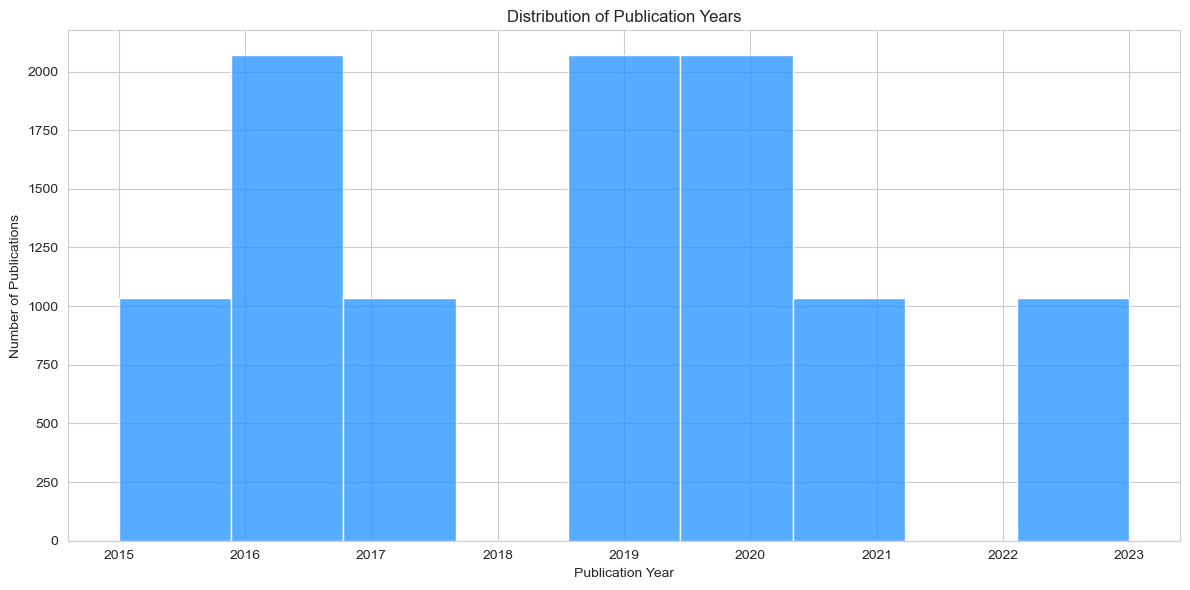

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting histogram for Publication Year
plt.figure(figsize=(12, 6))
sns.histplot(df['Publication_year'], kde=False, bins=9, color="dodgerblue")
plt.title('Distribution of Publication Years')
plt.xlabel('Publication Year')
plt.ylabel('Number of Publications')
plt.xticks(list(range(2015, 2024)))
plt.tight_layout()
plt.show()


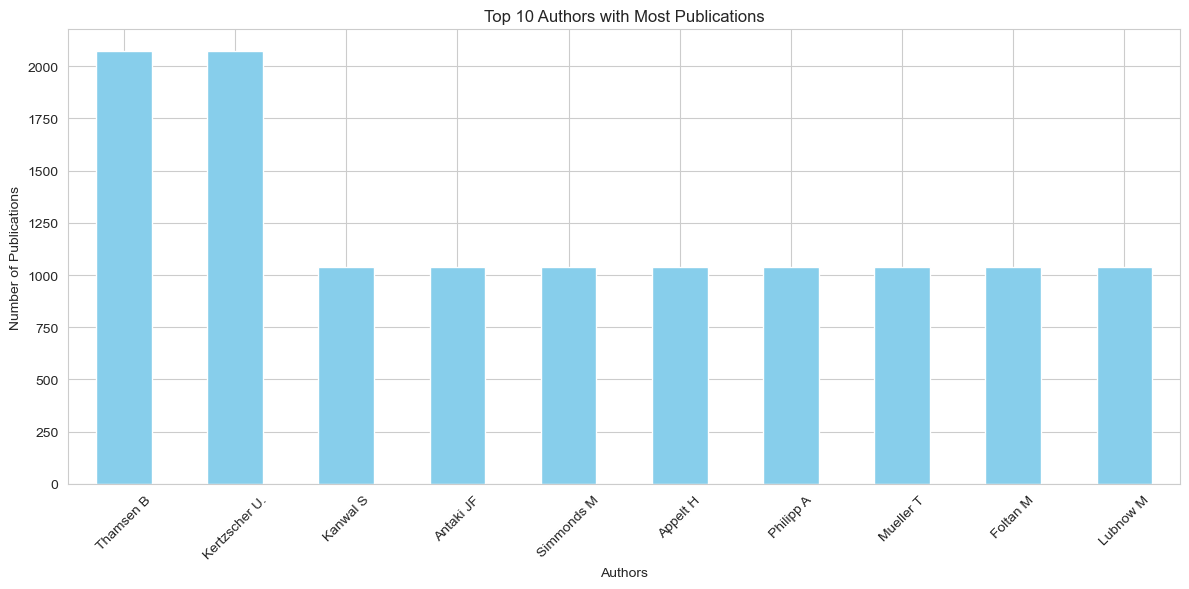

In [16]:
# Most frequent authors
all_authors = df['Authors'].str.split(',').explode().str.strip()
author_counts = all_authors.value_counts()
top_10_authors = author_counts.head(10)
plt.figure(figsize=(12, 6))
top_10_authors.plot(kind='bar', color='skyblue')
plt.title("Top 10 Authors with Most Publications")
plt.ylabel("Number of Publications")
plt.xlabel("Authors")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

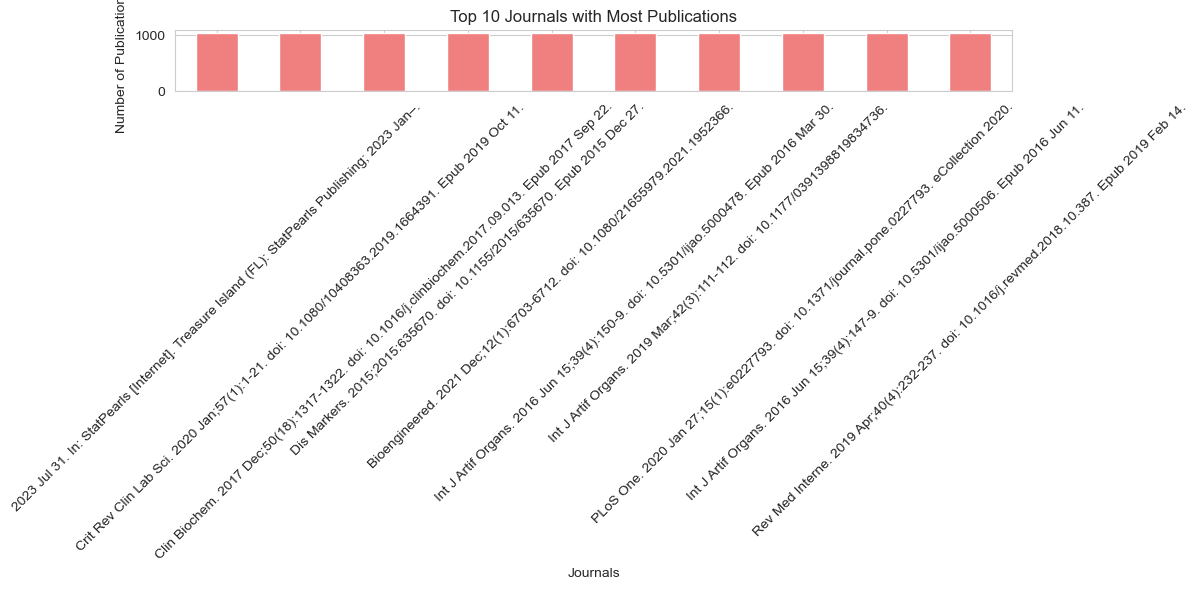

In [17]:
# 3. Journals with the highest number of publications
journal_counts = df['Journal'].value_counts()
top_10_journals = journal_counts.head(10)
plt.figure(figsize=(12, 6))
top_10_journals.plot(kind='bar', color='lightcoral')
plt.title("Top 10 Journals with Most Publications")
plt.ylabel("Number of Publications")
plt.xlabel("Journals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

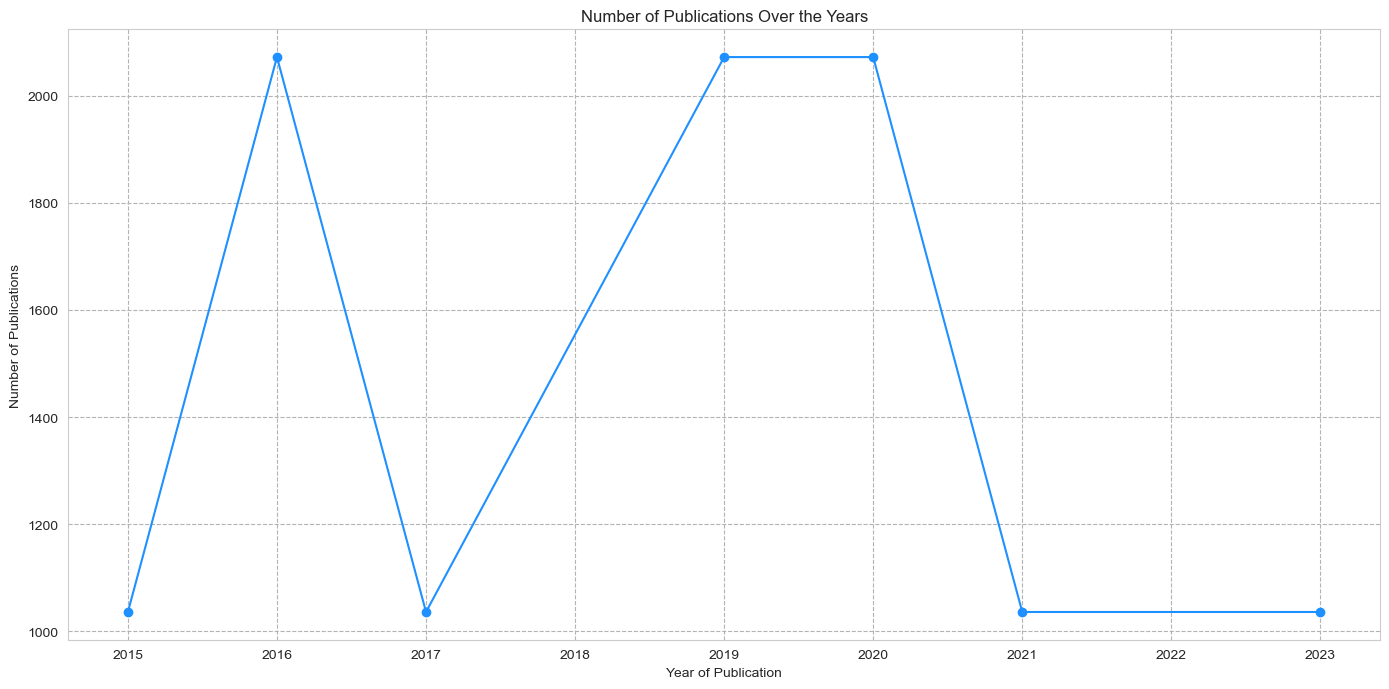

In [18]:
## Create a time series plot to visualize how the number of publications has evolved over the years

import pandas as pd
import matplotlib.pyplot as plt


# Grouping the dataset by "Publication_year" and counting the number of publications for each year
publications_per_year = df.groupby('Publication_year').size()

# Plotting the time series for number of publications over the years
plt.figure(figsize=(14, 7))
publications_per_year.plot(marker='o', linestyle='-', color='dodgerblue')
plt.title("Number of Publications Over the Years")
plt.ylabel("Number of Publications")
plt.xlabel("Year of Publication")
plt.grid(True, which="both", ls="--", c='0.7')

plt.tight_layout()
plt.show()


In [23]:
!pip uninstall wordcloud -y
!pip uninstall Pillow -y

Found existing installation: Pillow 9.4.0
Uninstalling Pillow-9.4.0:
  Successfully uninstalled Pillow-9.4.0


In [24]:
!pip install wordcloud --upgrade
!pip install Pillow --upgrade

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/5a/5f/f4164295d6853ec6203bc728dea4da76a7145ba70482eab9e994d26e0e13/wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata
  Using cached wordcloud-1.9.2-cp310-cp310-win_amd64.whl.metadata (3.4 kB)
  Obtaining dependency information for pillow from https://files.pythonhosted.org/packages/2d/7e/18ffce67b6e7637eead295b8a78d293d170d404a633010c3549da9a5e674/Pillow-10.1.0-cp310-cp310-win_amd64.whl.metadata
  Using cached Pillow-10.1.0-cp310-cp310-win_amd64.whl.metadata (9.6 kB)
Using cached wordcloud-1.9.2-cp310-cp310-win_amd64.whl (152 kB)
Using cached Pillow-10.1.0-cp310-cp310-win_amd64.whl (2.6 MB)


In [25]:
import wordcloud
import PIL

print("Wordcloud Version:", wordcloud.__version__)
print("Pillow Version:", PIL.__version__)

Wordcloud Version: 1.9.2
Pillow Version: 9.4.0


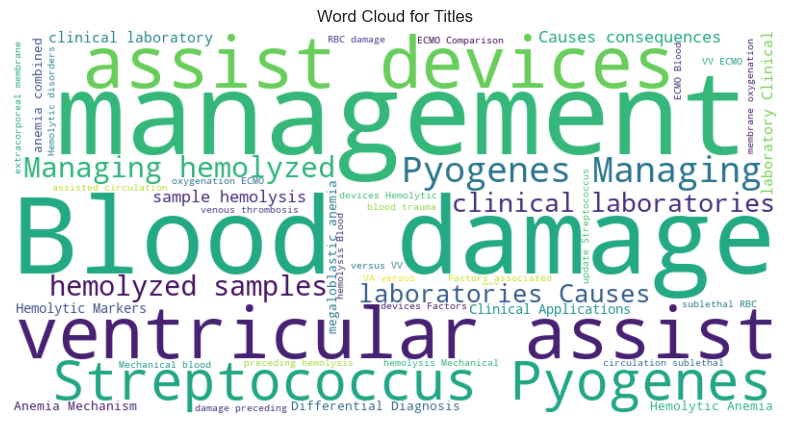

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extracting and preparing text data for the "Title" column
title_text = " ".join(title for title in df['Title'] if isinstance(title, str))

# Generating the word cloud for "Title"
wordcloud_title = WordCloud(background_color='white', width=800, height=400).generate(title_text)

# Displaying the word cloud for "Title"
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Titles")
plt.show()


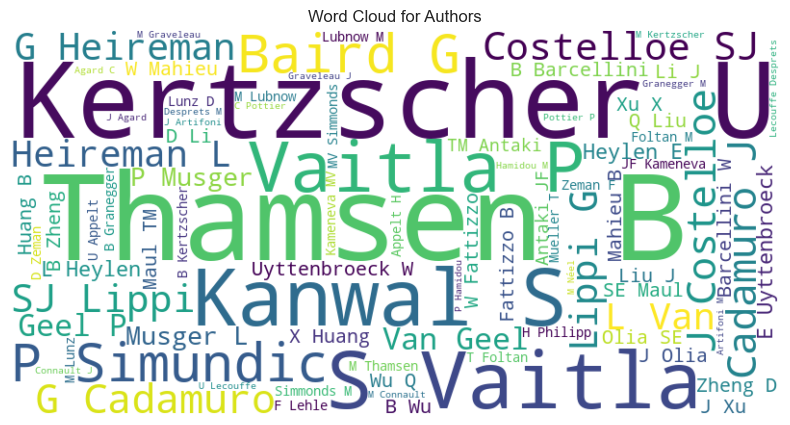

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Extracting and preparing text data for the "Title" column
title_text = " ".join(title for title in df['Title'])

# Generating the word cloud for "Title"
wordcloud_title = WordCloud(background_color='white', width=800, height=400).generate(title_text)

# Displaying the word cloud for "Title"
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Titles")
plt.show()